In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from scipy.optimize import curve_fit

# 1. Simulación estocástica primitiva

$\textbf{Parte A}$

Programe en Matlab (u otro lenguaje) una simulación de la expresión de un gen con tasa de transcripción constante, tasa de traducción constante por mRNA, dilución por proteína y destrucción por mRNA constantes (correspondientes a 𝑟̇ = 𝑘𝑟 − 𝛾𝑟𝑟 y 𝑝̇ = 𝑘𝑝𝑟 − 𝛾𝑝𝑝 ), usando la aproximación de intervalos de tiempo Δ𝑡 pequeños con tasas constantes de creación y destrucción por intervalo. Escoja constantes biológicamente relevantes.

$\textbf{Solución}$

Para la solución, se tomaron constantes de $k_r$ = 5 nt/s, $k_p$ = 2.5 aa/s , $\gamma_r$ = 0.5 nt/s y $\gamma_p$ = 0.25 aa/s. Esto debido a que en muchos organismos la tasa de transcripción es mayor que la de traducción. En este caso. se tomaron valores de dilución de proteína y de destrucción por mRNA menores a las tasas de transcripción con la finalidad de que existiera algun tiempo considerable de expresión del gen.

$\textit{Simulación}$ Este código toma como base el desarrollado durante la clase. La diferencia radica en que los factores se realiza una solución con la aproximación de $\Delta t $ pequeño. En vista de lo anterior, en lo realizado a continuación se toman las siguientes ecuaciones:

$\begin{align}
    r(t+\Delta t) &= k_r \Delta t - \gamma_r r \Delta t + r(t)\\
    p(t+\Delta t)  &= k_p r \Delta t - \gamma_p p  \Delta t + p(t)
\end{align}
$

Para determinar si se crea o no RNA o proteína, se toma un evento aleatorio como se realizó en clase.

In [3]:
def simulacion(r, p, t, dt, tmax, kr, kp, gammar, gammap):

    for i in range(len(t)-1):

        s1=kr*dt
        s2=gammar*r[i]*dt
        s3=kp*r[i]*dt
        s4=gammap*p[i]*dt

        st=s1+s2+s3+s4

        m=np.random.rand()

        if m<= (s1/st):
            r[i+1]=r[i]+s1
            p[i+1]=p[i]

        elif  m<= (s1+s2)/st:
            r[i+1]=r[i] - s2
            p[i+1]=p[i]

        elif m<= (s1+s2+s3)/st:
            r[i+1]=r[i]
            p[i+1]=p[i]+s3
            
        else:
            r[i+1]=r[i]
            p[i+1]=p[i]-s4

    return(t,r,p)

In [4]:
def graficauna(t, r, p, kr, kp, gammar,gammap, dt):
    
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1)
    
    ax1.step(t, r, color = "teal", label = "$k_r$ = {:.2f} $k_p$ = {:.2f} \n $\gamma_r$ = {:.2f} $\gamma_p$ = {:.2f}".format(kr,kp,gammar,gammap))
    ax1.set_xlabel("Tiempo [s]")
    ax1.set_ylabel("Nº de RNAs")
    ax1.legend()
    ax1.set_title("Nº de RNAs en el tiempo \n $\Delta t$ = {:.4f}".format(dt), size = 10, y = 1)
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.step(t, p,color = "orchid", label = "$k_r$ = {:.2f} $k_p$ = {:.2f} \n $\gamma_r$ = {:.2f} $\gamma_p$ = {:.2f}".format(kr,kp,gammar,gammap))
    ax2.set_xlabel("Tiempo [s]")
    ax2.set_ylabel("Nº de proteínas")
    ax2.legend()
    ax2.set_title("Nº de proteínas en el tiempo \n $\Delta t$ = {:.4f}".format(dt), size = 10, y = 1)
    
    return (fig)

In [5]:
def graficacelulas(t, r, p, kr, kp, gammar,gammap, dt):
    
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.step(t, r)
    ax1.set_xlabel("Tiempo [s]")
    ax1.set_ylabel("Nº de RNAs")
    ax1.set_title("Nº de RNAs en el tiempo \n Simulación para {} células \n $\Delta t$ = {:.4f}".format(numcelulasb, dt), size = 10)

    ax2b = fig.add_subplot(1,2,2)
    ax2b.step(t, p)
    ax2b.set_xlabel("Tiempo [s]")
    ax2b.set_ylabel("Nº de proteínas")
    ax2b.set_title("Nº de proteínas \n Simulación para {} células \n $\Delta t$ = {:.4f}".format(numcelulasb, dt), size = 10)
    
    return (fig)

In [6]:
def graficacelulasprom(t, r, p, kr, kp, gammar, gammap, tmax, dt, numcelulas):
    
    promr = np.zeros(tmax)
    promp = np.zeros(tmax)
    promt = np.zeros(tmax)

    
    promrall = np.mean(r)
    prompall = np.mean(p)

    varr = np.var(r)
    varp = np.var(p)

    ruidor = varr/(promrall**2)
    ruidop = varp/(prompall**2)



    for i in range(tmax):
        promr[i] = np.mean(r[i,:])
        promp[i] = np.mean(p[i,:])
        promt[i] = np.mean(t[i,:])


    #Gráfica promedio
    fig = plt.figure(figsize=(10,5))
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.step(promt, promr, color = "teal", label = "$k_r$ = {:.2f} $k_p$ = {:.2f} \n $\gamma_r$ = {:.2f} $\gamma_p$ = {:.2f}".format(kr,kp,gammar,gammap))
    ax1.set_xlabel("Tiempo [s]")
    ax1.set_ylabel("Nº de RNAs")
    ax1.legend()
    ax1.set_title("Nº de RNAs en el tiempo \n Simulación del promedio para {} células \n $\Delta t$ = {:.4f} ".format(numcelulas, dt), size = 10)

    ax2 = fig.add_subplot(1,2,2)
    ax2.step(promt, promp, color = "orchid", label = "$k_r$ = {:.2f} $k_p$ = {:.2f} \n $\gamma_r$ = {:.2f} $\gamma_p$ = {:.2f}".format(kra,kpa,gammara,gammapa))
    ax2.set_xlabel("Tiempo [s]")
    ax2.set_ylabel("Nº de proteínas")
    ax2.legend()
    ax2.set_title(" Nº de proteínas en el tiempo \n Simulación del promedio para {} células\n $\Delta t$ = {:.4f} ".format(numcelulas, dt), size = 10)
    
    print("El promedio de RNA fue de {:.2f}, el de proteína de {:.3f} \nEl ruido de la transcripción de {:.3f} y de la traducción de {:.3f}".format(promrall, prompall, ruidor, ruidop))
    return (fig)


<IPython.core.display.Javascript object>


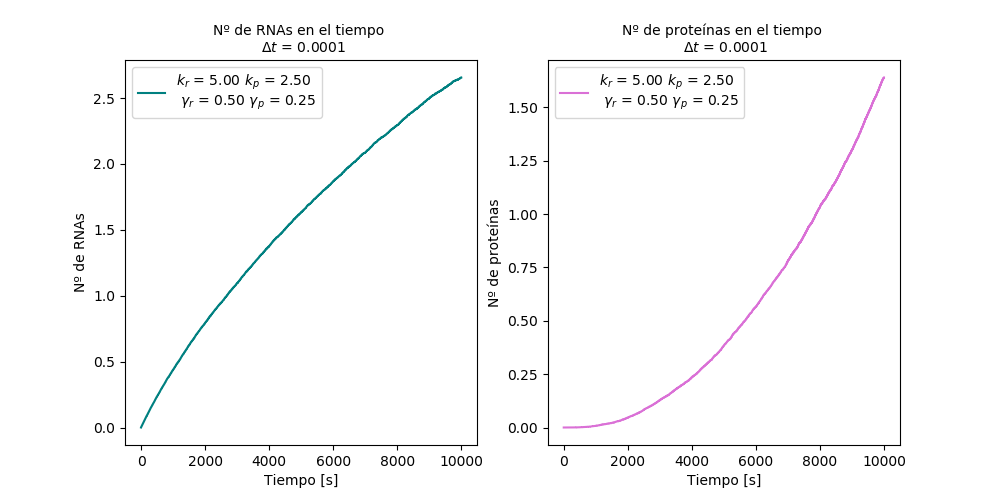

In [7]:
#Parámetros punto a
r0a=0
p0a=0

kra=5
kpa=2.5

gammara=kra/10
gammapa=kpa/10

tmaxa=10000

dta = 1e-4

ra= np.zeros(tmaxa)
ra[r0a]=0

pa= np.zeros(tmaxa)
pa[p0a]=0

ta= np.linspace(0,tmaxa,tmaxa)

ta, ra, pa = simulacion(ra, pa, ta, dta, tmaxa, kra, kpa, gammara, gammapa)
figa = graficauna(ta, ra, pa, kra, kpa, gammara,gammapa, dta)

$\textbf{Comentarios}$

Como se observa en las gráficas, la tendencia descrita por el RNA es a alcanzar una cota superior donde se estabilice en el tiempo. Así mismo, existe una fuerte relación entre la cantidad de proteínas y la de RNA producido. Es importante resaltar que en este caso en particular los niveles de proteínas son menores que los de RNA por las tasas de creación y destrrcción escogidas pero la función de las proteínas crece más rápido que la de RNA. 

$\textbf{Parte B}$

Cree un programa que corra repetidamente su simulación para tener una muestra de 500 células. Grafique el promedio del mRNA y la proteína en función del tiempo comenzando desde 𝑟(0) = 0 y 𝑝(0) = 0 y la distribución resultante en estado estacionario. Obtenga su promedio y ruido numéricamente.


$\textbf{Solución}$

Para la simulación con 500 células se utilizaron los mismos parámetros del punto anterior. El código tomó como base el desarrollado durante la clase pero con las aproximaciones mencionadas en la parte A.
Se obtuvieron los promedios y los ruidos para los RNAs y las proteínas usando los resultados en el estado estacionario. El ruido se calculó con el factor $\eta$ 

<IPython.core.display.Javascript object>


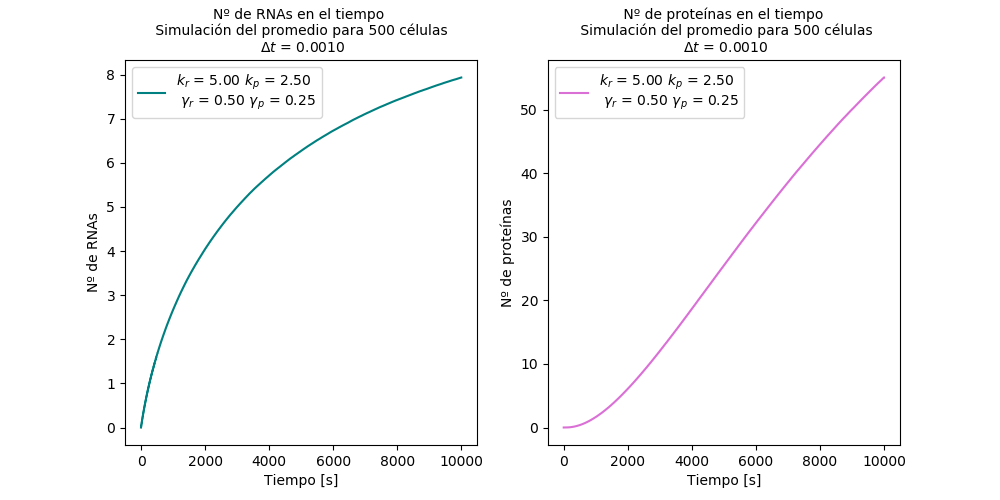

El promedio de RNA fue de 5.70, el de proteína de 25.653 
El ruido de la transcripción de 0.116 y de la traducción de 0.471


In [8]:
numcelulasb = 500

r0b=0
p0b=0

krb=5
kpb=2.5

gammarb=krb/10
gammapb=kpb/10

tmaxb=10000

dtb = 1e-3

rb= np.zeros((tmaxb, numcelulasb))
rb[:, r0b]=0

pb= np.zeros((tmaxb, numcelulasb))
pb[:, p0b]=0

tb= np.zeros((tmaxb, numcelulasb))

for j in range(numcelulasb):
    tb[:,j] = np.linspace(0,tmaxb,tmaxb)
    tb[:,j], rb[:,j], pb[:,j] = simulacion(rb[:,j], pb[:,j], tb[:,j], dtb, tmaxb, krb, kpb, gammarb, gammapb)
    
figb = graficacelulasprom(tb, rb, pb, krb, kpb, gammarb, gammapb, tmaxb, dtb, numcelulasb)

$\textbf{Comentarios}$

Evidentemente, se observa que se obtienen mayores valores de RNA y de proteínas puesto que es un mayor grupo de células pero aún en el promedio se obtienen mayores valores que en el de para una célula. También cabe resaltar que en este caso los niveles de proteínas exceden los de RNA a pesar de que las tasas sean las mismas, esto está relacionado con el comportamiento de la función a crecer más rápido.

$\textbf{Parte C}$

Determine el Δ𝑡 máximo antes de que cambien apreciablemente los resultados del punto b). Determine cuánto tiempo tarda su programa para simular 100 células durante 10/𝛾𝑝 unidades de tiempo.

<IPython.core.display.Javascript object>


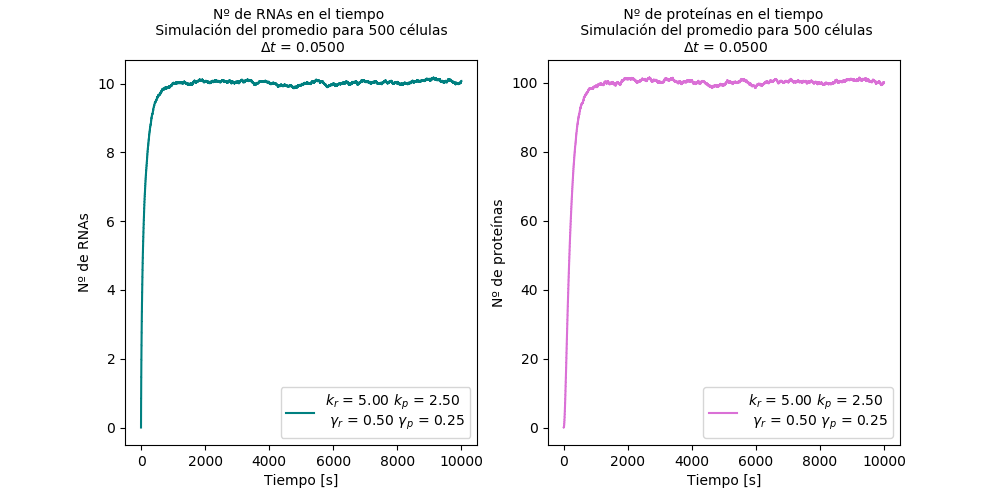

El promedio de RNA fue de 9.90, el de proteína de 97.964 
El ruido de la transcripción de 0.017 y de la traducción de 0.029


In [9]:
st = time.time()
numcelulasc = 500
#numcelulasc = 100

r0c=0
p0c=0

krc=5
kpc=2.5

gammarc=krc/10
gammapc=kpc/10

tmaxc=10000

dtc = numcelulasc/tmaxc
#dtc2 = 10/gammapc 

rc= np.zeros((tmaxc, numcelulasc))
rc[:, r0c]=0

pc= np.zeros((tmaxc, numcelulasc))
pc[:, p0c]=0

tc= np.zeros((tmaxc, numcelulasc))

for j in range(numcelulasc):
    tc[:,j] = np.linspace(0,tmaxc,tmaxc)
    tc[:,j], rc[:,j], pc[:,j] = simulacion(rc[:,j], pc[:,j], tc[:,j], dtc, tmaxc, krc, kpc, gammarc, gammapc)
    
#et = time.time()

#print(et-st)
figc1 = graficacelulasprom(tc, rc, pc, krc, kpc, gammarc, gammapc, tmaxc, dtc, numcelulasc)

$\textbf{Comentarios}$

Se puede ver que para un $\Delta$ t de 0.05 correspondiente al factor #Células/tiempo hace que los resultados varíen significativamente en cuanto a que el valor de saturación se alcanza en un menor tiempo para el ARN y la proteína, esto último se refleja en los valores del promedio que resultan mayores comparados con el caso en el que $\Delta t$ es menor. También cabe notar que disminuten los ruidos puesto que el nivel de saturación se alcanza en menor tiempo.
Al programa le toma 25.173 segundos correr la simulación para 100 células y un espaciado temporal de 10/$\gamma_p$

$\textbf{Parte C}$

Cambie su simulación para incluir retroalimentación negativa

In [10]:
#Simulación 2
def simulacion2(r, p, t, dt, tmax, kr, kp, gammar, gammap):

    k = gammar/gammap
    
    for i in range(len(t)-1):

        s1=kr*dt/(1 + (p[i]/k)**2)
        s2=gammar*r[i]*dt
        s3=kp*r[i]*dt
        s4=gammap*p[i]*dt

        st=s1+s2+s3+s4

        m=np.random.rand()

        if m<= (s1/st):
            r[i+1]=r[i]+s1
            p[i+1]=p[i]

        elif  m<= (s1+s2)/st:
            r[i+1]=r[i] - s2
            p[i+1]=p[i]

        elif m<= (s1+s2+s3)/st:
            r[i+1]=r[i]
            p[i+1]=p[i]+s3
            
        else:
            r[i+1]=r[i]
            p[i+1]=p[i]-s4

    return(t,r,p)

Con retroalimentación negativa


<IPython.core.display.Javascript object>


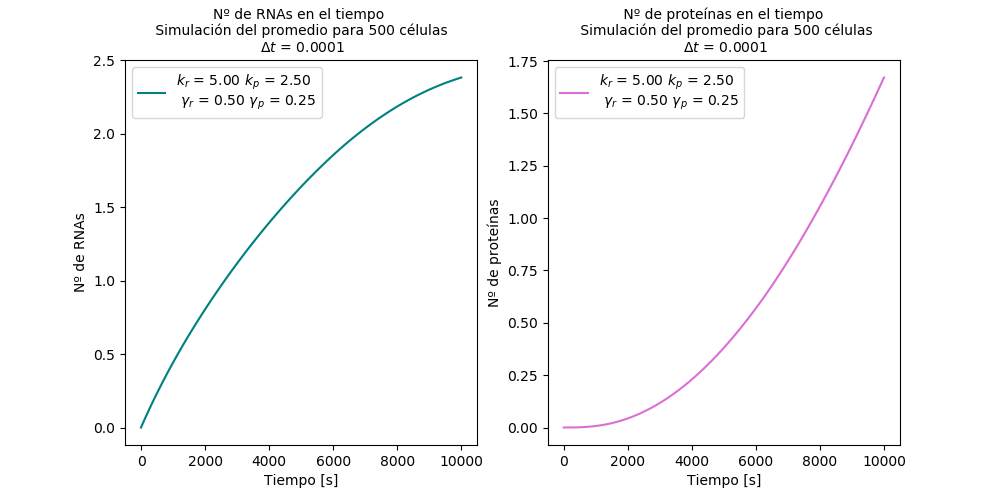

El promedio de RNA fue de 1.50, el de proteína de 0.536 
El ruido de la transcripción de 0.208 y de la traducción de 0.886


In [11]:
numcelulasd = 500

r0d=0
p0d=0

krd=5
kpd=2.5

gammard=krd/10
gammapd=kpd/10

tmaxd=10000

dtd = 1e-4

rd= np.zeros((tmaxd, numcelulasd))
rd[:, r0d]=0

pd= np.zeros((tmaxd, numcelulasd))
pb[:, p0d]=0

td= np.zeros((tmaxd, numcelulasd))

for j in range(numcelulasd):
    td[:,j] = np.linspace(0,tmaxd,tmaxd)
    td[:,j], rd[:,j], pd[:,j] = simulacion2(rd[:,j], pd[:,j], td[:,j], dtd, tmaxd, krd, kpd, gammard, gammapd)

print("Con retroalimentación negativa")
figd = graficacelulasprom(td, rd, pd, krd, kpd, gammard, gammapd, tmaxd, dtd, numcelulasd)

$\textbf{Comentarios}$

Se puede ver que cuando hay retroalimentación negativa, disminuyen los promedios de RNA y de proteínas como se esperaría. También se ve que aumenta el ruido en comparación con el caso sin retroalimentación. Esto último puede deberse a una propagación del error. 

# 2: Fundamentos del algoritmo de Gillespie

$\textbf{Parte A}$

Dibuje una distribución exponencial con media r e ilustre gráficamente por qué la función $\tau = \frac{1}{r}\ln \left(\frac{1}{u}\right)$ donde u es un numero aleatorio uniformemente distribuido entre 0 y 1, produce una distribución exponencial.

<IPython.core.display.Javascript object>


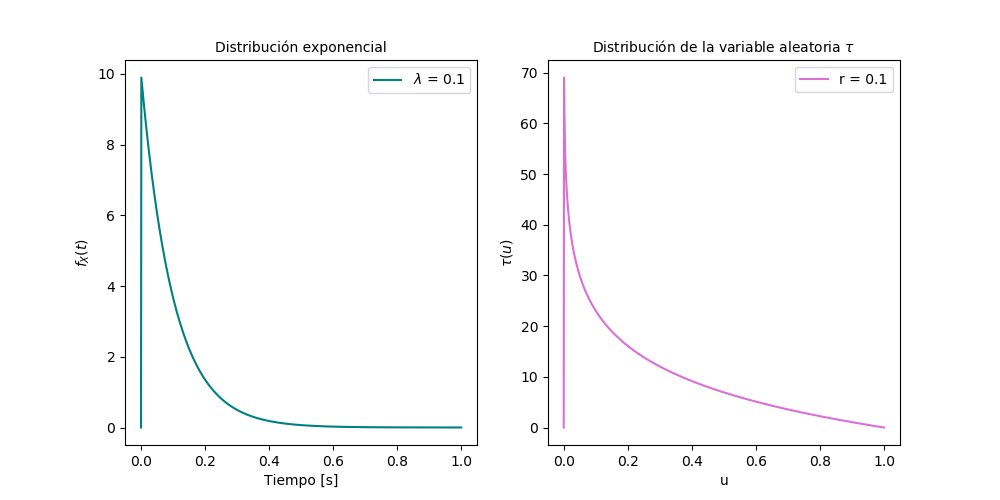

In [12]:
def ExponentialD(beta,t): 
    lamb = 1/beta
    funcion = np.zeros(len(t))
    for i in range(len(t)):
        if t[i]>0:
            funcion[i] = lamb*np.exp(-lamb*t[i])
        else:
            funcion[i] = 0
    return funcion

def ExponentialD2(beta,t): 
    lamb = 1/beta
    funcion = lamb*np.exp(-lamb*t)
    return funcion

def Exprtau(r, t):
    funcion = np.zeros(len(t))
    for i in range(len(t)):
        if t[i]>0:
            funcion[i] = (1/r)*np.log(1/t[i])
        else:
            funcion[i] = 0
            
    return(funcion)

def Exprtau2(r, t):
    funcion = (1/r)*np.log(1/t)
    return(funcion)

def figExp(t, expd, expt, lamb, r):
    
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(t,expd , color = "teal", label = "$\lambda$ = {}".format(lamb))
    ax1.set_xlabel("Tiempo [s]")
    ax1.set_ylabel("$f_X(t)$")
    ax1.legend()
    ax1.set_title("Distribución exponencial", size = 10)

    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(t,expt , color = "orchid", label = "r = {}".format(r))
    ax2.set_xlabel("u")
    ax2.set_ylabel("$\\tau(u)$")
    ax2.legend()
    ax2.set_title("Distribución de la variable aleatoria $\\tau$", size = 10)
    
    return(fig)



lamb = 1/10
r = 1/10
t2a = np.linspace(0,1,1000)
expd = ExponentialD(lamb,t2a)
exprt = Exprtau(lamb, t2a)

fig2 = figExp(t2a, expd, exprt, lamb, r)


$\textbf{Comentarios}$

Al graficar una distribución exponencial y una que sigue una variable aleatoria $\tau$, se obtiene el mismo comportamiento. Con esto en mente, se puede usar esta distribución para generar números aleatorios que tengan un comportamiento exponencial. 

$\textbf{Parte B}$

Genere 500 números con distribución exponencial (r=10) y dibuje su histograma.

Para realizar esto, se usará el modulo de numpy de random. 

In [13]:
def histograma(x, lamb):
    fig = plt.figure(figsize=(10,5))

    ax1 = fig.add_subplot(1,1,1)
    ax1.hist(x, bins = 10, color = "teal", label = "$\lambda$ = {}".format(lamb))
    ax1.legend()
    ax1.set_title("Histograma de los números aleatorios \n con distribución exponencial", size = 10)
    
    return (fig)

<IPython.core.display.Javascript object>


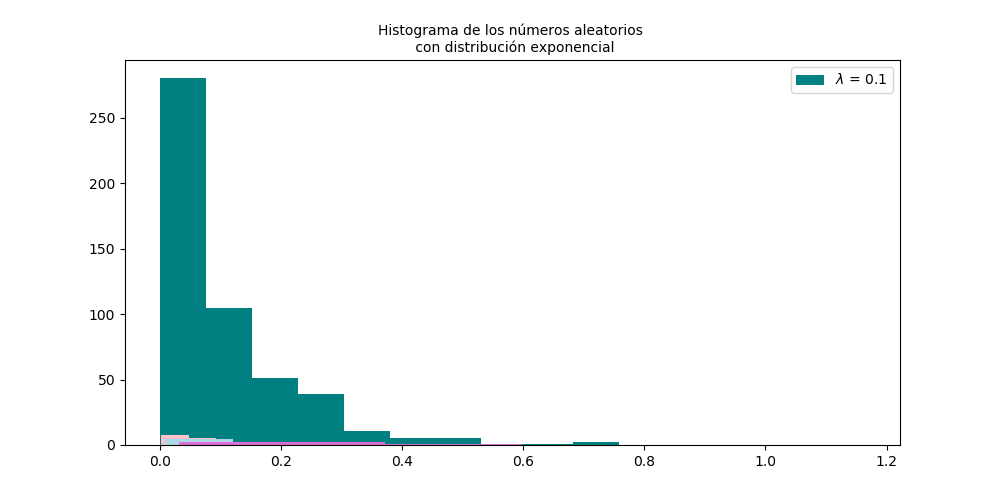

In [14]:
randnum = np.random.exponential(scale = lamb, size = 500)
fig2b = histograma(randnum, lamb)


$\textbf{Parte C}$

Para dos reacciones independientes (A, B) con tasas promedio constantes de r=10 y r=5, genere una serie de tiempo donde ocurran al menos 50 eventos de cada tipo. Haga el histograma de los tiempos entre eventos del mismo tipo y entre eventos en general. Ajuste a cada histograma una exponencial y encuentre sus medias.

In [15]:
def figAjustesHist(tauA, tauB, t, expda, expdb, expdg, parametersA, parametersB, parametersG, rA, rB):
    
    fig = plt.figure(figsize=(15,5))
    
    ax1 = fig.add_subplot(1,3,1)
    ax1.hist(tauA, density = True, color = "pink")
    ax1.plot(t, expda, "--", color = "crimson", label = "Ajuste media $\lambda$ = {:.2f}".format(parametersA[0]))
    ax1.legend()
    ax1.set_xlabel("Variable u")
    ax1.set_ylabel("Tiempo de reacción")
    ax1.set_title("Evento A con r = {}".format(rA), size = 10)

    ax2 = fig.add_subplot(1,3,2)
    ax2.hist(tauB, density = True, color = "lightblue")
    ax2.plot(t, expdb, "--", color = "steelblue", label = "Ajuste media $\lambda$ = {:.2f}".format(parametersB[0]))
    ax2.legend()
    ax2.set_xlabel("Variable u")
    ax2.set_ylabel("Tiempo de reacción")
    ax2.set_title("Evento B con r = {}".format(rB), size = 10)

    ax3 = fig.add_subplot(1,3,3)
    ax3.hist(tauA+tauB, density = True, color = "orchid")
    ax3.plot(t, expdg, "--", color = "violet", label = "Ajuste media $\lambda$ = {:.2f}".format(parametersG[0]))
    ax3.legend()
    ax3.set_xlabel("Variable u")
    ax3.set_ylabel("Tiempo de reacción")
    ax3.set_title("Eventos conjuntos", size = 10)


    return(fig)

<IPython.core.display.Javascript object>


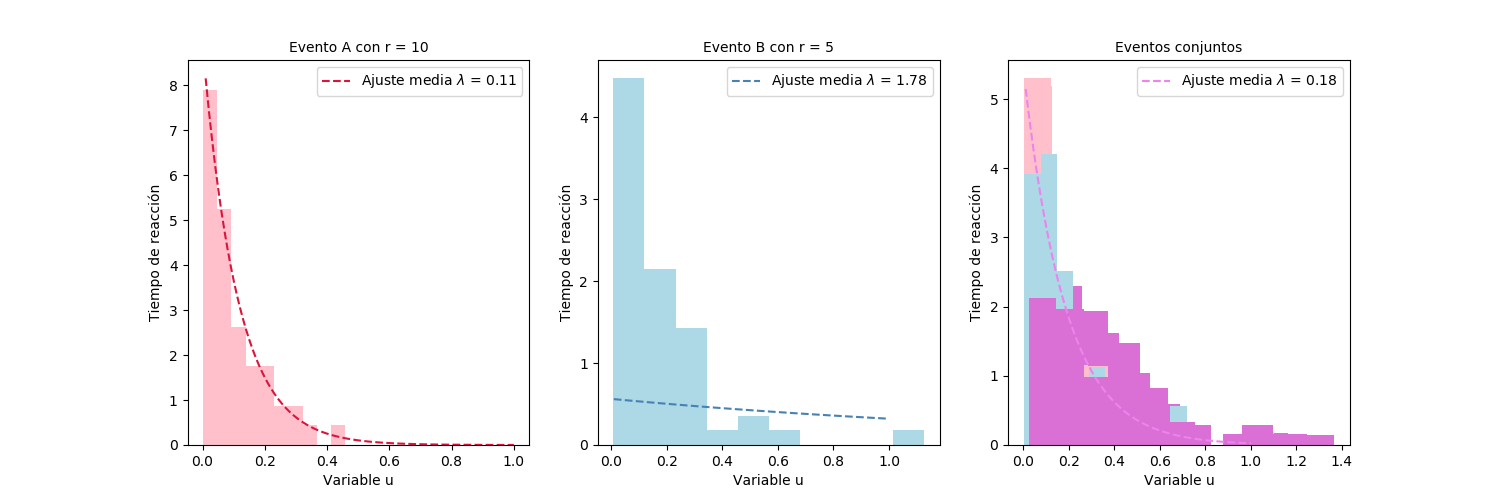

In [16]:
Neventos = 50

rA = 10
rB = 5

uA = np.random.rand(Neventos)
uB = np.random.rand(Neventos)

tauA = Exprtau(rA, uA)
tauB = Exprtau(rB, uB)


dA = plt.hist(tauA, density = True, color = "pink")
dB = plt.hist(tauB, density = True, color = "lightblue")
dG = plt.hist(tauA+tauB, density = True, color = "orchid")

yA = dA[0]
xA = dA[1][0:-1]

yB = dB[0]
xB = dB[1][0:-1]

yG = dG[0]
xG = dG[1][0:-1]

parametersA, covarianceA = curve_fit(ExponentialD2, xdata = xA, ydata = yA)
parametersB, covarianceB = curve_fit(ExponentialD2, xdata = xB, ydata = yB)
parametersG, covarianceG = curve_fit(ExponentialD2, xdata = xG, ydata = yG)

t2c = np.linspace(0.01,1,100)
expda = ExponentialD2(parametersA,t2c)
expdb = ExponentialD2(parametersB,t2c)
expdg = ExponentialD2(parametersG,t2c)


fig2c = figAjustesHist(tauA, tauB, t2c, expda, expdb, expdg, parametersA, parametersB, parametersG, rA, rB)

$\textbf{Comentarios}$
Con estos resultados es posible comprobar que las funciones$ \tau$ siguen un comportamiento exponencial. También se observa que las medias disminuyen a medida que aumenta el valor de rA o rB y que en el caso de eventos en general la media resulta como:

$\begin{equation}
    \frac{1}{\lambda_g} = \frac{1}{\gamma_A} + \frac{1}{\lambda_B}
\end{equation}$



$\textbf{Parte D}$

Genere una serie de tiempo para una reacción A con tasa promedio constantes de r=15, pero para cada evento genere un numero aleatorio con probabilidad 1/3 de cambiar el tipo de reacción a B. Haga el histograma de los tiempos entre eventos del mismo tipo y entre eventos en general. Ajuste a cada histograma una exponencial y encuentre sus medias.

<IPython.core.display.Javascript object>


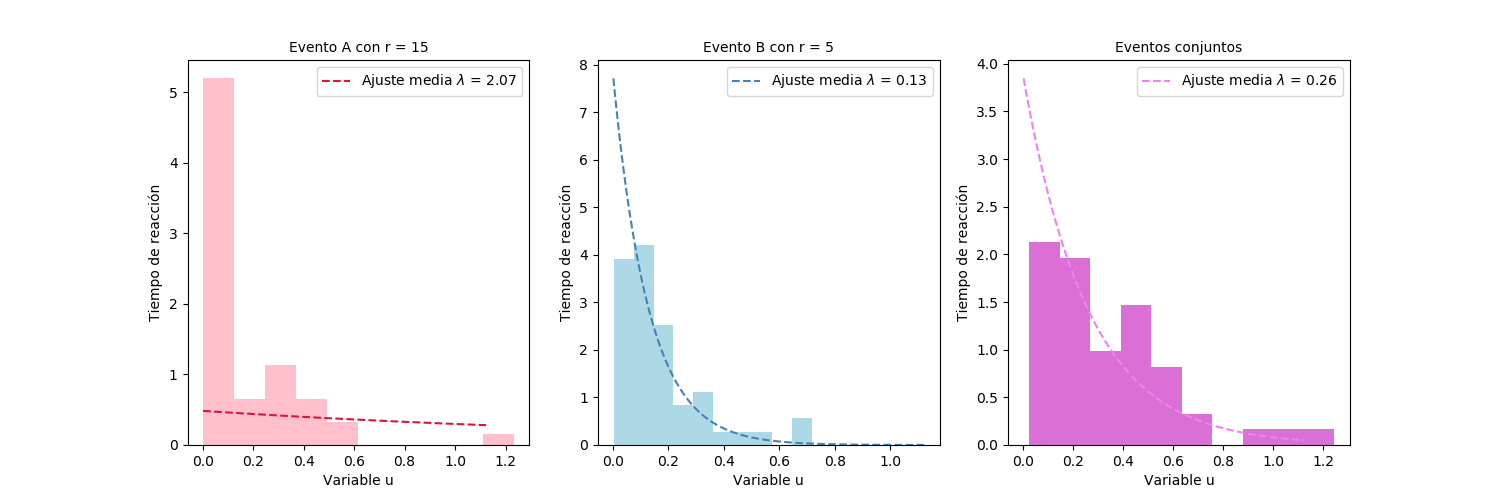

In [18]:
rAd = 15
rBd = 5

uBd = np.random.rand(Neventos)
tauBd = Exprtau2(rBd, uBd)
tauAd = np.zeros(Neventos)

for n in range(Neventos):
    uAd = np.random.rand(1)[0]

    if uAd<=(1/3):
        tauAd[n] = Exprtau2(rBd, uAd)
    else: 
        tauAd[n] = Exprtau2(rAd, uAd)

dAd = plt.hist(tauAd, density = True, color = "pink")
dBd = plt.hist(tauBd, density = True, color = "lightblue")
dGd = plt.hist(tauAd+tauBd, density = True, color = "orchid")

yAd = dAd[0]
xAd = dAd[1][0:-1]

yBd = dBd[0]
xBd = dBd[1][0:-1]

yGd = dGd[0]
xGd = dGd[1][0:-1]

parametersAd, covarianceAd = curve_fit(ExponentialD2, xdata = xAd, ydata = yAd)
parametersBd, covarianceBd = curve_fit(ExponentialD2, xdata = xBd, ydata = yBd)
parametersGd, covarianceGd = curve_fit(ExponentialD2, xdata = xGd, ydata = yGd)

t2d2 = np.linspace(0.001,np.max(xGd),100)
expdad = ExponentialD2(parametersAd,t2d2)
expdbd = ExponentialD2(parametersBd,t2d2)
expdgd = ExponentialD2(parametersGd,t2d2)

fig2d = figAjustesHist(tauAd, tauBd, t2d2, expdad, expdbd, expdgd, parametersAd, parametersBd, parametersGd, rAd, rBd)

$\textbf{Comentarios}$

Debido a que existe una probabilidad de 1/3 de cambiar de evento a B, el valor de la media es mayor en A que en B de manera que la función decrece más rápido. Esto contrasta con el caso anterior donde un mayor r indicaría un menor valor de la media. En este caso, no se cumple la regla dada anteriormente para relacionar las medias del caso general con los particulares debido a que las probabilidades no estan equipartidas. 

# 3. Simulación estocástica con algoritmo de Gillespie

$\textbf{Parte A}$

Programe en Matlab (u otro lenguaje) una simulación de la expresión de un gen con tasa de transcripción constante, tasa de traducción constante por mRNA, dilución por proteína y destrucción por mRNA constantes (correspondientes a 𝑟̇ = 𝑘𝑟 − 𝛾𝑟𝑟 y 𝑝̇ = 𝑘𝑝𝑟 − 𝛾𝑝𝑝 ), usando el algoritmo de Gillespie. Escoja constantes biológicamente relevantes (las mismas de la tarea anterior).

Este código se realizó a partir del desarrollado durante la clase, no se varía en algún sentido.

In [19]:
#Simulación
def simulacion3(r0, p0, tmax, kr, kp, gammar, gammap):

    r= np.zeros(tmax)
    p= np.zeros(tmax)
    r[r0]=0
    p[p0]=0

    t= np.zeros(tmax3)
    for i in range(len(t)-1):

        s1=kr
        s2=gammar*r[i]
        s3=kp*r[i]
        s4=gammap*p[i]

        st=s1+s2+s3+s4

        t[i+1]=t[i]+(-1/st)*np.log(np.random.rand())
        
        m=np.random.rand()

        if m<= (s1/st):
            r[i+1]=r[i]+s1
            p[i+1]=p[i]

        elif  m<= (s1+s2)/st:
            r[i+1]=r[i] - s2
            p[i+1]=p[i]

        elif m<= (s1+s2+s3)/st:
            r[i+1]=r[i]
            p[i+1]=p[i]+s3
            
        else:
            r[i+1]=r[i]
            p[i+1]=p[i]-s4

    return(t,r,p)

In [20]:
def graficaunaG(t, r, p, kr, kp, gammar,gammap):
    
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1)
    
    ax1.step(t, r, color = "teal", label = "$k_r$ = {:.2f} $k_p$ = {:.2f} \n $\gamma_r$ = {:.2f} $\gamma_p$ = {:.2f}".format(kr,kp,gammar,gammap))
    ax1.set_xlabel("Tiempo [s]")
    ax1.set_ylabel("Nº de RNAs")
    ax1.legend()
    ax1.set_title("Nº de RNAs en el tiempo \n Algoritmo de Gillespie", size = 10, y = 1)

    ax2 = fig.add_subplot(1,2,2)
    ax2.step(t, p,color = "orchid", label = "$k_r$ = {:.2f} $k_p$ = {:.2f} \n $\gamma_r$ = {:.2f} $\gamma_p$ = {:.2f}".format(kr,kp,gammar,gammap))
    ax2.set_xlabel("Tiempo [s]")
    ax2.set_ylabel("Nº de proteínas")
    ax2.legend()
    ax2.set_title("Nº de proteínas en el tiempo \n Algoritmo de Gillespie", size = 10, y = 1)
    
    return (fig)

In [21]:
def graficacelulasG(t, r, p, kr, kp, gammar,gammap, numcelulas):
    
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.step(t, r)
    ax1.set_xlabel("Tiempo [s]")
    ax1.set_ylabel("Nº de RNAs")
    ax1.set_title("Nº de RNAs en el tiempo \n Simulación para {} células \n Algoritmo de Gillespie".format(numcelulas), size = 10)

    ax2b = fig.add_subplot(1,2,2)
    ax2b.step(t, p)
    ax2b.set_xlabel("Tiempo [s]")
    ax2b.set_ylabel("Nº de proteínas")
    ax2b.set_title("Nº de proteínas \n Simulación para {} células \n Algoritmo de Gillespie".format(numcelulas), size = 10)
   
    return (fig)

In [22]:
def graficacelulaspromG(t, r, p, kr, kp, gammar, gammap, tmax, numcelulas):
    
    promr = np.zeros(tmax)
    promp = np.zeros(tmax)
    promt = np.zeros(tmax)

    
    promrall = np.mean(r)
    prompall = np.mean(p)

    varr = np.var(r)
    varp = np.var(p)

    ruidor = varr/(promrall**2)
    ruidop = varp/(prompall**2)



    for i in range(tmax):
        promr[i] = np.mean(r[i,:])
        promp[i] = np.mean(p[i,:])
        promt[i] = np.mean(t[i,:])


    #Gráfica promedio
    fig = plt.figure(figsize=(10,5))
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.step(promt, promr, color = "teal", label = "$k_r$ = {:.2f} $k_p$ = {:.2f} \n $\gamma_r$ = {:.2f} $\gamma_p$ = {:.2f}".format(kr,kp,gammar,gammap))
    ax1.set_xlabel("Tiempo [s]")
    ax1.set_ylabel("Nº de RNAs")
    ax1.legend()
    ax1.set_title("Nº de RNAs en el tiempo \n Simulación del promedio para {} células \n Algoritmo de Gillespie ".format(numcelulas), size = 10)

    ax2 = fig.add_subplot(1,2,2)
    ax2.step(promt, promp, color = "orchid", label = "$k_r$ = {:.2f} $k_p$ = {:.2f} \n $\gamma_r$ = {:.2f} $\gamma_p$ = {:.2f}".format(kra,kpa,gammara,gammapa))
    ax2.set_xlabel("Tiempo [s]")
    ax2.set_ylabel("Nº de proteínas")
    ax2.legend()
    ax2.set_title(" Nº de proteínas en el tiempo \n Simulación del promedio para {} células \n Algoritmo de Gillespie ".format(numcelulas), size = 10)
    
    print("El promedio de RNA fue de {:.2f}, el de proteína de {:.3f} \nEl ruido de la transcripción de {:.3f} y de la traducción de {:.3f}".format(promrall, prompall, ruidor, ruidop))
    return (fig)


<IPython.core.display.Javascript object>


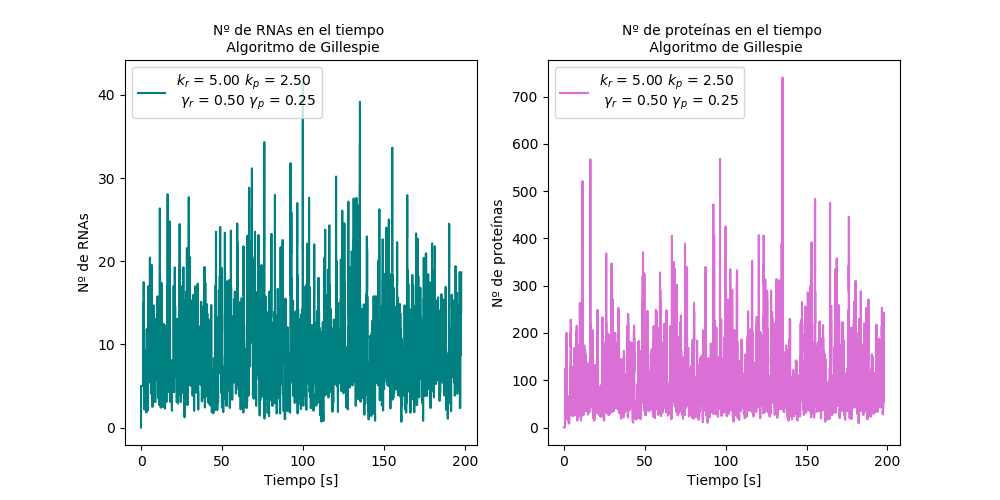

In [23]:
#Parámetros
r03=0
p03=0
kr3=5
kp3=2.5

gammar3=kr3/10
gammap3=kp3/10

tmax3 = 10000
t3a, r3a, p3a = simulacion3(r03, p03, tmax3, kr3, kp3, gammar3, gammap3)
fig3a = graficaunaG(t3a, r3a, p3a, kr3, kp3, gammar3,gammap3)

$\textbf{Comentarios}$

En este caso a pesar de que se tengan los mismos parámetros que en el punto 1 y se el sistema de 1 célula, los valores de RNAs y proteínas son mayores en gran parte por la ausencia del factor $\Delta t$. También, se alcanza un nivel estable y acaba la transicripción y traducción en menores tiempos. 

$\textbf{Parte B}$

Cree un programa que corra repetidamente su simulación para tener una muestra de 1000 células. Grafique el promedio del mRNA y la proteína en función del tiempo comenzando desde 𝑟(0) = 0 y 𝑝(0) = 0 y la distribución resultante en estado estacionario. Obtenga su promedio y ruido numéricamente.


In [24]:
#Simulación
def simulacion3b(r0, p0, tmax, kr, kp, gammar, gammap, cells):

    r= np.zeros((tmax,cells))
    t= np.zeros((tmax,cells))
    r[r0,:]=0
    p= np.zeros((tmax,cells))
    p[p0,:]=0

    for j in range(cells-1):
        for i in range(tmax-1):
            s1=kr
            s2=gammar*r[i,j]
            s3=kp*r[i,j]
            s4=gammap*p[i,j]
            st=s1+s2+s3+s4
            t[i+1,j]=t[i,j]+(-1/st)*np.log(np.random.rand())
            m=np.random.rand()

            if m<= (s1/st):
                r[i+1,j]=r[i,j]+1
                p[i+1,j]=p[i,j]
            elif  m<= (s1+s2)/st:

                r[i+1,j]=r[i,j]-1
                p[i+1,j]=p[i,j]
            elif m<= (s1+s2+s3)/st:
                r[i+1,j]=r[i,j]
                p[i+1,j]=p[i,j]+1
            else:
                r[i+1,j]=r[i,j]
                p[i+1,j]=p[i,j]-1


    return(t,r,p)

In [25]:
numcelulas3 = 1000
#tmax3 = int(10/gammap3)
tmax3 = 1000
start = time.time()
t3b, r3b, p3b = simulacion3b(r03, p03, tmax3, kr3, kp3, gammar3, gammap3, numcelulas3)
end = time.time()
print("Tiempo que le toma {:.4f} segundos".format(end-start))

Tiempo que le toma 9.6242 segundos


<IPython.core.display.Javascript object>


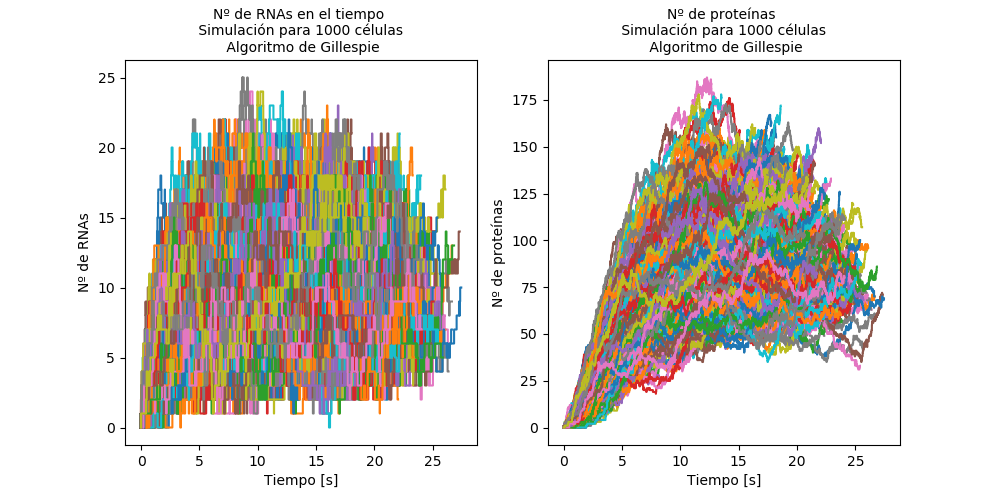

In [26]:
fig3b1 = graficacelulasG(t3b, r3b, p3b, kr3, kp3, gammar3,gammap3, numcelulas3)

<IPython.core.display.Javascript object>


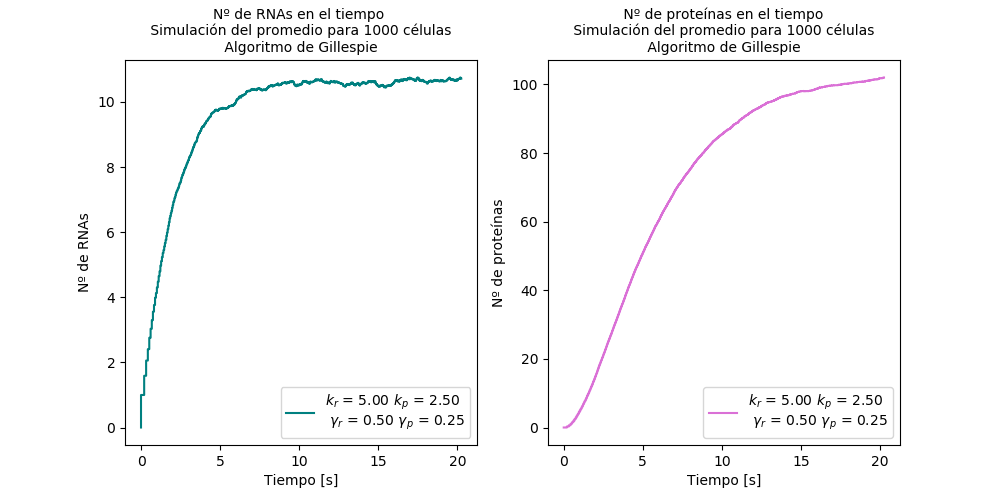

El promedio de RNA fue de 10.13, el de proteína de 80.217 
El ruido de la transcripción de 0.107 y de la traducción de 0.143


In [27]:
fig3b2 = graficacelulaspromG(t3b, r3b, p3b, kr3, kp3, gammar3,gammap3, tmax3, numcelulas3)

$\textbf{Comentarios}$


En comparación con el primer punto, se obtiene que el promedio de RNAs y de proteínas es mayor teniendo en cuenta la proporción 5:1 de células entre estos dos casos.
También, se observa que con este método el ruido de la traducción es menor. 

c) Determine cuánto tiempo tarda su programa para simular 100 células durante 10/𝛾𝑝 unidades de tiempo.

Al programa le toma 0.0611 segundos

# 4: Retroalimentación negativa

$\textbf{Parte A}$

Cambie su simulación para incluir retroalimentación negativa

In [28]:
#Simulación
def simulacion4(r0, p0, tmax, kr, kp, gammar, gammap, cells, h):

    r= np.zeros((tmax,cells))
    t= np.zeros((tmax,cells))
    r[r0,:]=0
    p= np.zeros((tmax,cells))
    p[p0,:]=0

    k = kr/gammar
    
    if (h>=0):
    
        for j in range(cells-1):
            for i in range(tmax-1):
                s1=kr/(1 + ((p[i,j]/k)**h))
                s2=gammar*r[i,j]
                s3=kp*r[i,j]
                s4=gammap*p[i,j]
                st=s1+s2+s3+s4
                t[i+1,j]=t[i,j]+(-1/st)*np.log(np.random.rand())
                m=np.random.rand()

                if m<= (s1/st):
                    r[i+1,j]=r[i,j]+1
                    p[i+1,j]=p[i,j]
                elif  m<= (s1+s2)/st:

                    r[i+1,j]=r[i,j]-1
                    p[i+1,j]=p[i,j]
                elif m<= (s1+s2+s3)/st:
                    r[i+1,j]=r[i,j]
                    p[i+1,j]=p[i,j]+1
                else:
                    r[i+1,j]=r[i,j]
                    p[i+1,j]=p[i,j]-1

    elif (h<0):
        
        for j in range(cells-1):
            for i in range(tmax-1):
                
                if (p[i,j]!=0):
                    s1=kr
                    s2=gammar*r[i,j]
                    s3=kp*r[i,j]
                    s4=gammap*p[i,j]
                    st=s1+s2+s3+s4
                    t[i+1,j]=t[i,j]+(-1/st)*np.log(np.random.rand())
                    m=np.random.rand()

                    if m<= (s1/st):
                        r[i+1,j]=r[i,j]+1
                        p[i+1,j]=p[i,j]
                    elif  m<= (s1+s2)/st:

                        r[i+1,j]=r[i,j]-1
                        p[i+1,j]=p[i,j]
                    elif m<= (s1+s2+s3)/st:
                        r[i+1,j]=r[i,j]
                        p[i+1,j]=p[i,j]+1
                    else:
                        r[i+1,j]=r[i,j]
                        p[i+1,j]=p[i,j]-1
                        
                elif (p[i,j]==0):
                    s1=kr/(1 + ((p[i,j]/k)**(-h)))
                    s2=gammar*r[i,j]
                    s3=kp*r[i,j]
                    s4=gammap*p[i,j]
                    st=s1+s2+s3+s4
                    t[i+1,j]=t[i,j]+(-1/st)*np.log(np.random.rand())
                    m=np.random.rand()

                    if m<= (s1/st):
                        r[i+1,j]=r[i,j]+1
                        p[i+1,j]=p[i,j]
                    elif  m<= (s1+s2)/st:

                        r[i+1,j]=r[i,j]-1
                        p[i+1,j]=p[i,j]
                    elif m<= (s1+s2+s3)/st:
                        r[i+1,j]=r[i,j]
                        p[i+1,j]=p[i,j]+1
                    else:
                        r[i+1,j]=r[i,j]
                        p[i+1,j]=p[i,j]-1

    return(t,r,p)

In [29]:
#Parámetros
r04=0
p04=0
kr4=5
kp4=2.5

gammar4=kr4/10
gammap4=kp4/10
numcelulas4 = 1000
tmax4 = 1000

start = time.time()
t4a, r4a, p4a = simulacion4(r04, p04, tmax4, kr4, kp4, gammar4, gammap4, numcelulas4, 2)
end = time.time()
print("Tiempo que le toma {:.4f} segundos".format(end-start))

#Promedio
promr4a = np.zeros(tmax4)
promp4a = np.zeros(tmax4)
promt4a = np.zeros(tmax4)

for i in range(tmax4):
    promr4a[i] = np.mean(r4a[i,:])
    promp4a[i] = np.mean(p4a[i,:])
    promt4a[i] = np.mean(t4a[i,:])

Tiempo que le toma 10.4299 segundos


Con retroalimentación negativa


<IPython.core.display.Javascript object>


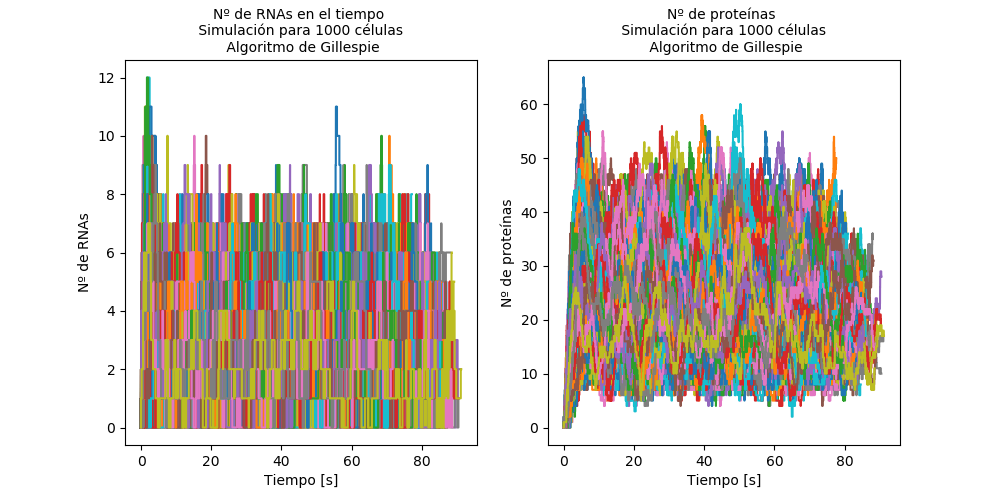

In [30]:
print("Con retroalimentación negativa")
fig4a1 = graficacelulasG(t4a, r4a, p4a, kr4, kp4, gammar4,gammap4, numcelulas4)

Con retroalimentación negativa


<IPython.core.display.Javascript object>


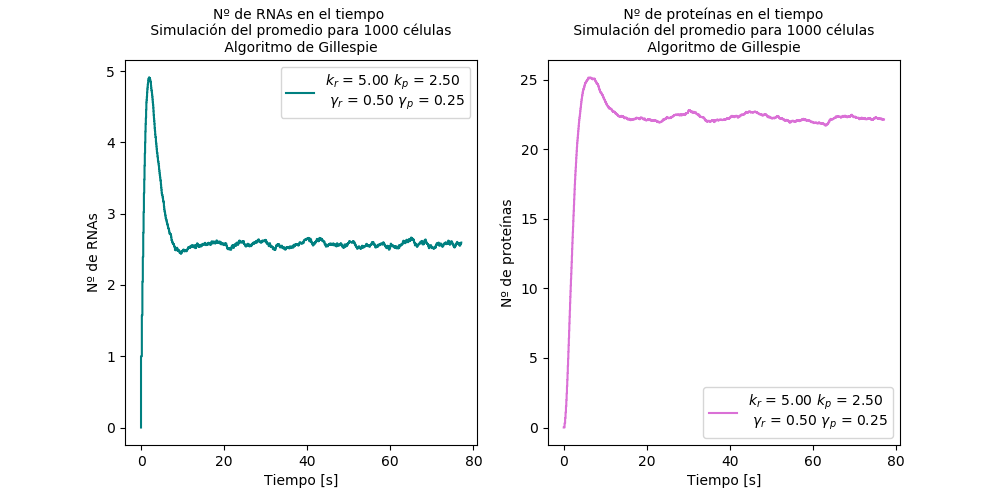

El promedio de RNA fue de 2.70, el de proteína de 21.855 
El ruido de la transcripción de 0.316 y de la traducción de 0.114


In [31]:
print("Con retroalimentación negativa")
fig4a2 = graficacelulaspromG(t4a, r4a, p4a, kr4, kp4, gammar4,gammap4, tmax4, numcelulas4)

$\textbf{Comentarios}$

Se nota que los promedios de RNA y de proteína fueron menores que en el caso sin retroalimentación. Esto indica que la tendencia a bajar los niveles de la retroalimentación negativa es independiente del método computacional como se esperaría. 
Un aspecto que difiere con el método que usa la aproximación para $\Delta t$ es que en el algoritmo de Gillespie el ruido de la transicripción aumenta y el de la traducción disminuye.

$\textbf{Parte B}$

De las graficas del promedio de proteína en función del tiempo puede leer directamente el tiempo de
respuesta (ver tarea 2.3). ¿Cómo cambia el tiempo de respuesta entre el caso con y sin retroalimentación?

$\textbf{Solución}$

En el caso de la retroalimentación negativa:
    Para RNA cuyo valor medio entre el tiempo 0 y el de estabilidad es de 1.25 RNAs aproximadamente, le toma 0.490 segundos.
    Para las proteínas con valor medio de 11 aproximadamente le toma 2.229 segundos.
    
En el caso sin retroalimentación negativa: 
    Para RNA cuyo valor medio entre el tiempo 0 y el de estabilidad es de 5.00 RNAs aproximadamente, le toma 1.331 segundos.
    Para las proteínas con valor medio de 45 aproximadamente le toma 4.575 segundos.

Lo anterior indica que el tiempo de respuesta con retroalimentación negativa es mayor. 

$\textbf{Parte C}$

¿Cómo cambia el ruido si h=4?

In [32]:

start = time.time()
t4c, r4c, p4c = simulacion4(r04, p04, tmax4, kr4, kp4, gammar4, gammap4, numcelulas4, 4)
end = time.time()
print("Tiempo que le toma {:.4f} segundos".format(end-start))

#Promedio
promr4c = np.zeros(tmax4)
promp4c = np.zeros(tmax4)
promt4c = np.zeros(tmax4)

for i in range(tmax4):
    promr4c[i] = np.mean(r4c[i,:])
    promp4c[i] = np.mean(p4c[i,:])
    promt4c[i] = np.mean(t4c[i,:])

Tiempo que le toma 10.2728 segundos


Con retroalimentación negativa y un factor de Hill de 4


<IPython.core.display.Javascript object>


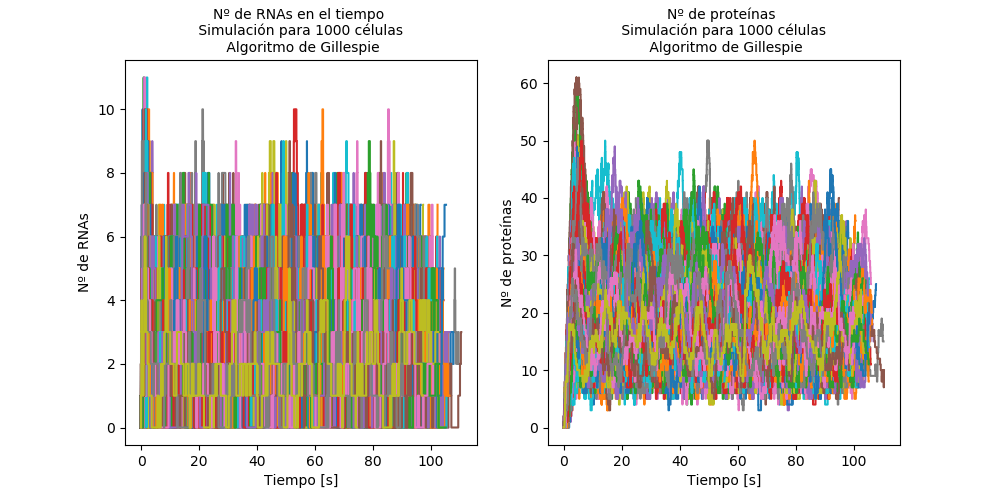

In [33]:
print("Con retroalimentación negativa y un factor de Hill de 4")
fig4c1 = graficacelulasG(t4c, r4c, p4c, kr4, kp4, gammar4,gammap4, numcelulas4)

Con retroalimentación negativa y un factor de Hill de 4


<IPython.core.display.Javascript object>


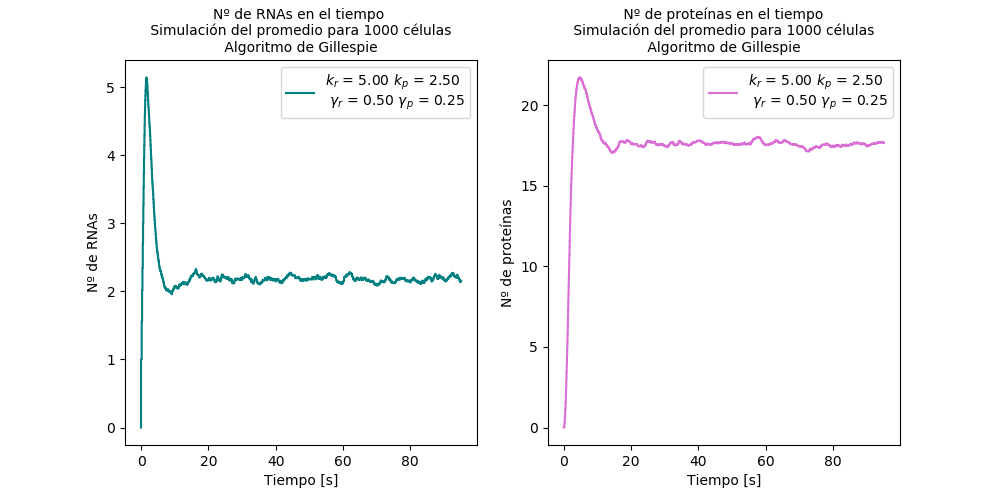

El promedio de RNA fue de 2.30, el de proteína de 17.459 
El ruido de la transcripción de 0.404 y de la traducción de 0.119


In [34]:
print("Con retroalimentación negativa y un factor de Hill de 4")
fig4c2 = graficacelulaspromG(t4c, r4c, p4c, kr4, kp4, gammar4,gammap4, tmax4, numcelulas4)

$\textbf{Comentarios}$

Se puede ver que los ruidos de la transcripción y de la traducción aumentan y los promedios de RNA y de proteína disminuyen.

$\textbf{Parte D}$

Cambie su simulación para incluir retroalimentación positiva

In [35]:
#Parámetros
start = time.time()
t4d, r4d, p4d = simulacion4(r04, p04, tmax4, kr4, kp4, gammar4, gammap4, numcelulas4, -2)
end = time.time()
print("Tiempo que le toma {:.4f} segundos".format(end-start))

#Promedio
promr4d = np.zeros(tmax4)
promp4d = np.zeros(tmax4)
promt4d = np.zeros(tmax4)

for i in range(tmax4):
    promr4d[i] = np.mean(r4d[i,:])
    promp4d[i] = np.mean(p4d[i,:])
    promt4d[i] = np.mean(t4d[i,:])

Tiempo que le toma 11.3849 segundos


Con retroalimentación positiva y un factor de Hill de -2


<IPython.core.display.Javascript object>


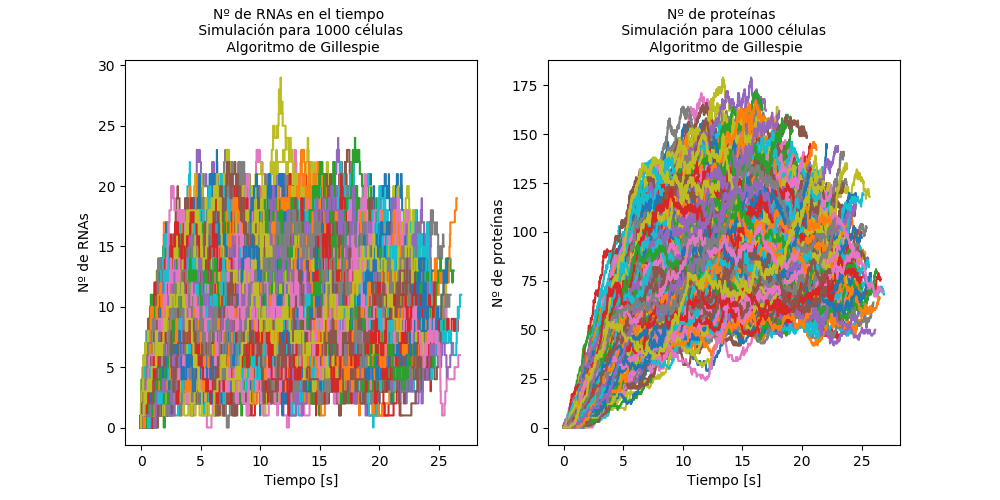

In [36]:
print("Con retroalimentación positiva y un factor de Hill de -2")
fig4d1 = graficacelulasG(t4d, r4d, p4d, kr4, kp4, gammar4,gammap4, numcelulas4)

Con retroalimentación positiva y un factor de Hill de -2


<IPython.core.display.Javascript object>


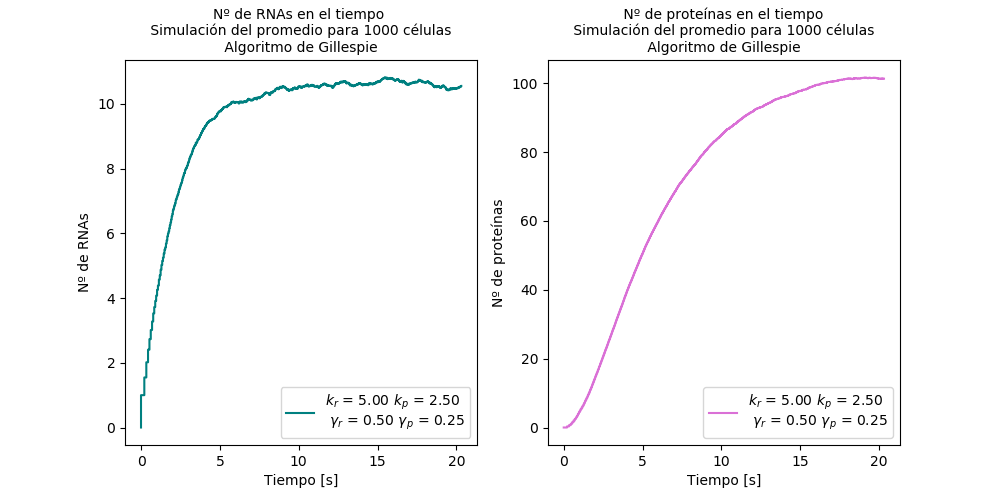

El promedio de RNA fue de 10.10, el de proteína de 80.235 
El ruido de la transcripción de 0.110 y de la traducción de 0.145


In [37]:
print("Con retroalimentación positiva y un factor de Hill de -2")
fig4d2 = graficacelulaspromG(t4d, r4d, p4d, kr4, kp4, gammar4,gammap4, tmax4, numcelulas4)

$\textbf{Comentarios}$

En el caso en el que no se han creado proteínas, se debe crear primero ARN y luego proteína para seguir con el proceso de retroalimentación positiva. En vista de lo anteior, en el caso en el que no se había creado proteína aún (p=0), se tomó la ecuación sin ningún tipo de retroalimentación.  

$\textit{Tiempos de respuesta}$
En el caso de la retroalimentación positiva:
    Para RNA cuyo valor medio entre el tiempo 0 y el de estabilidad es de 5 RNAs aproximadamente, le toma 1.267 segundos.
    Para las proteínas con valor medio de 50 aproximadamente le toma 5.121 segundos.
   
$\textit{Promedios y ruido}$
En comparación con los resultados anteriores sobre retroalimetación negativa se observa que el promedio de RNA y de proteína fue mayor y que los ruidos fueron menores. De igual manera, los tiempos de respuesta del RNA fueron mayores que en el caso sin retroalimentación y menores que en el caso con retroalimentación negativa mientras que los de traducción fueron menores que en el caso sin retroalimentación y mayores que en el caso con retroalimentación negativa. 

$\textbf{Parte e}$

Encuentre parámetros para los cuales haya monoestabilidad baja, monoestabilidad alta y biestabilidad, lo
cual se puede comprobar comenzando la simulación en 𝑝 = 0 y 𝑝 = 𝑘𝑝𝑘𝑟 y determinando si la distribución final 𝛾𝑝 𝛾𝑟
es la misma.

$\textbf{Solución}$

En un sistema donde hay una interacción entre dos componentes pueden existir o no puntos estables. Estos puntos dependen de los parámetros y corresponden a la solución en el caso estacionario. 

Así las cosas, se pueden estudiar las soluciones para los dos tipos de retroalimentación. En este caso se busca que se de lo mismo cuando $p_0$ = 0 de manera que la solución no cambia según el tipo de retroalimentación.

Así pues

\begin{align}
    \frac{dr}{dt} &= \frac{k_r}{1+ (p/k)^2} - \gamma_r r  = 0 \\
    & \xrightarrow[]{} r = \frac{k_p k_r}{1+ (p/k)^2}
\end{align}

\begin{align}
    \frac{dp}{dt} &= k_p r  - \gamma_p p  = 0 \\
    & \xrightarrow[]{} r = \frac{k_p k_r}{\gamma_p \gamma_r}
\end{align}

\begin{align}
    & \frac{k_p k_r}{1+ (p/k)^2} = \frac{k_p k_r}{\gamma_p \gamma_r} \\
    & \xrightarrow[]{} p^2 = k^2\left(\frac{k_p k_r}{\gamma_p \gamma_r} - 1 \right) \\
    & \xrightarrow[]{} \frac{k_p k_r}{\gamma_p \gamma_r} = 1 
\end{align}

Así para monoestabilidad baja se busca que se tenga bajo RNA o baja proteína baja, para la alta que se tenga alto RNA o alta proteína y para biestabilidad que ambas tengan la misma tendencia.

In [38]:
#Parámetros monoestabilidad alta
r04e=0
kr4e=1/30
kp4e=30

gammar4e=30
gammap4e=1/30

p04e=int((kr4e*kp4e)/(gammar4e*gammap4e))

numcelulas4 = 100
tmax4 = 10000


start = time.time()
t4e1, r4e1, p4e1 = simulacion4(r04e, p04e, tmax4, kr4e, kp4e, gammar4e, gammap4e, numcelulas4, 2)
end = time.time()
print("Tiempo que le toma {:.4f} segundos".format(end-start))

#Promedio
promr4e1 = np.zeros(tmax4)
promp4e1 = np.zeros(tmax4)
promt4e1 = np.zeros(tmax4)

for i in range(tmax4):
    promr4e1[i] = np.mean(r4e1[i,:])
    promp4e1[i] = np.mean(p4e1[i,:])
    promt4e1[i] = np.mean(t4e1[i,:])

Tiempo que le toma 11.1751 segundos


Con retroalimentación positiva y un factor de Hill de -2 buscando monoestabilidad alta


<IPython.core.display.Javascript object>


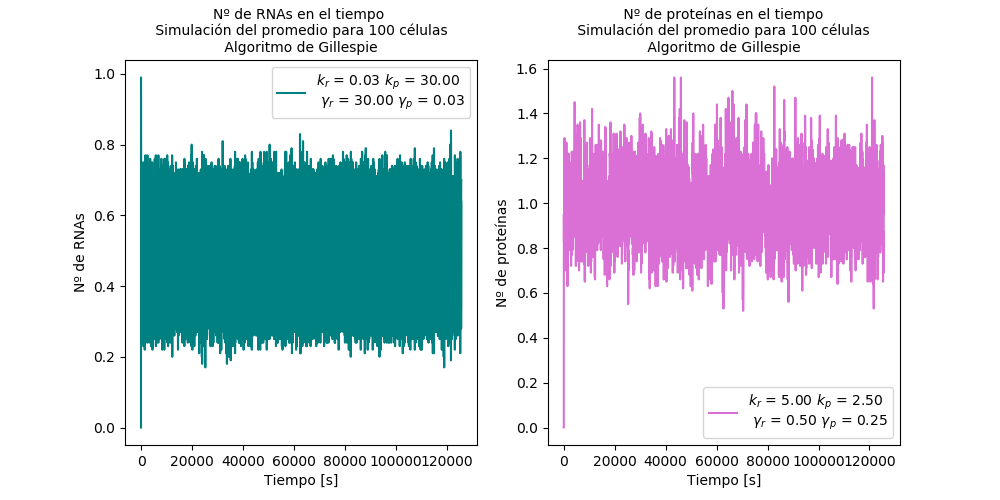

El promedio de RNA fue de 0.50, el de proteína de 0.991 
El ruido de la transcripción de 1.020 y de la traducción de 2.032


In [39]:
print("Con retroalimentación positiva y un factor de Hill de -2 buscando monoestabilidad alta")
fig4e1 = graficacelulaspromG(t4e1, r4e1, p4e1, kr4e, kp4e, gammar4e,gammap4e, tmax4, numcelulas4)

In [40]:
#Parámetros monoestabilidad baja
r04eb=0
kr4eb=2
kp4eb=1/2

gammar4eb=1/2
gammap4eb=2

p04eb=int((kr4eb*kp4eb)/(gammar4eb*gammap4eb))

numcelulas4 = 100
tmax4 = 10000


start = time.time()
t4eb, r4eb, p4eb = simulacion4(r04eb, p04eb, tmax4, kr4eb, kp4eb, gammar4eb, gammap4eb, numcelulas4, 2)
end = time.time()
print("Tiempo que le toma {:.4f} segundos".format(end-start))

#Promedio
promr4eb = np.zeros(tmax4)
promp4eb = np.zeros(tmax4)
promt4eb = np.zeros(tmax4)

for i in range(tmax4):
    promr4eb[i] = np.mean(r4eb[i,:])
    promp4eb[i] = np.mean(p4eb[i,:])
    promt4eb[i] = np.mean(t4eb[i,:])

Tiempo que le toma 11.2748 segundos


Con retroalimentación positiva y un factor de Hill de -2 buscando monoestabilidad baja


<IPython.core.display.Javascript object>


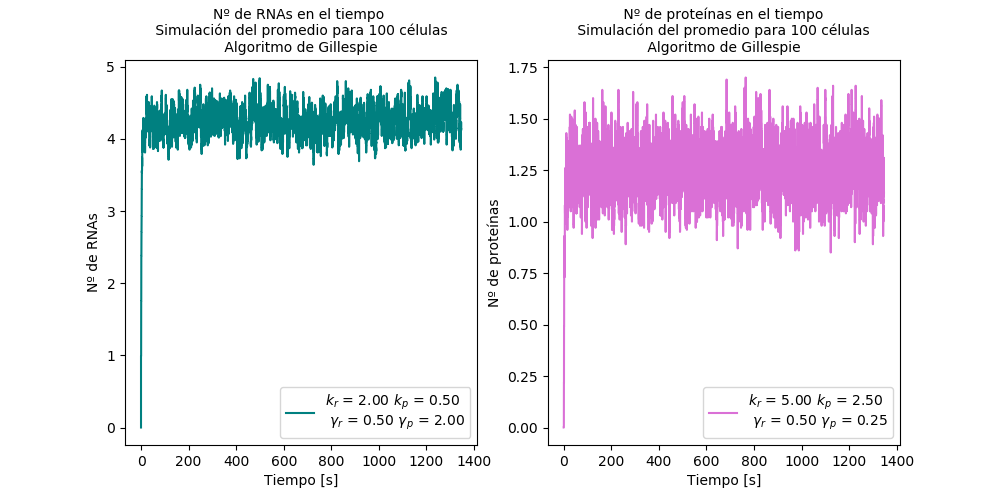

El promedio de RNA fue de 4.25, el de proteína de 1.249 
El ruido de la transcripción de 0.205 y de la traducción de 0.879


In [41]:
print("Con retroalimentación positiva y un factor de Hill de -2 buscando monoestabilidad baja")
fig4eb = graficacelulaspromG(t4eb, r4eb, p4eb, kr4eb, kp4eb, gammar4eb,gammap4eb, tmax4, numcelulas4)

In [42]:
#Parámetros biestabilidad
r04ec=0
kr4ec=5
kp4ec=5

gammar4ec=5
gammap4ec=5

p04ec=int((kr4ec*kp4ec)/(gammar4ec*gammap4ec))

numcelulas4 = 100
tmax4 = 10000


start = time.time()
t4ec, r4ec, p4ec = simulacion4(r04ec, p04ec, tmax4, kr4ec, kp4ec, gammar4ec, gammap4ec, numcelulas4, 2)
end = time.time()
print("Tiempo que le toma {:.4f} segundos".format(end-start))

#Promedio
promr4ec = np.zeros(tmax4)
promp4ec = np.zeros(tmax4)
promt4ec = np.zeros(tmax4)

for i in range(tmax4):
    promr4ec[i] = np.mean(r4ec[i,:])
    promp4ec[i] = np.mean(p4ec[i,:])
    promt4ec[i] = np.mean(t4ec[i,:])

Tiempo que le toma 11.5423 segundos


Con retroalimentación positiva y un factor de Hill de -2 buscando biestabilidad


<IPython.core.display.Javascript object>


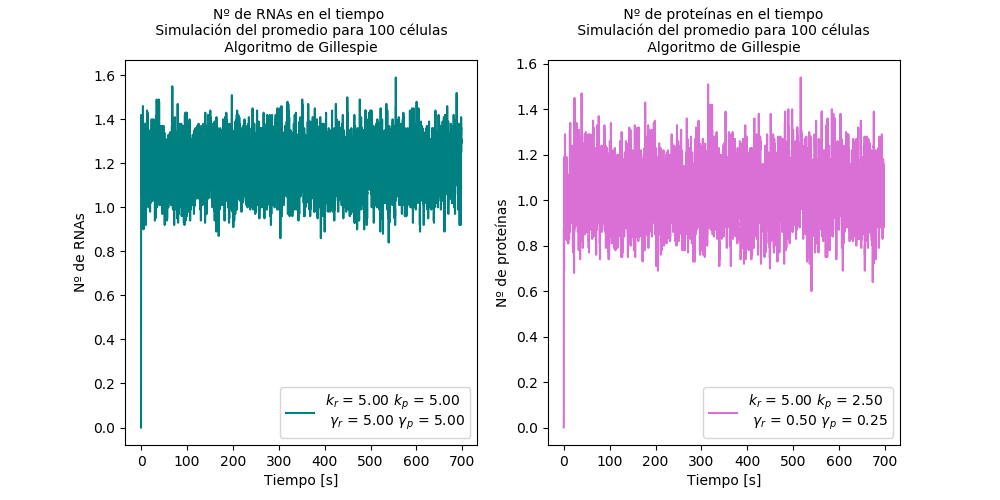

El promedio de RNA fue de 1.20, el de proteína de 1.033 
El ruido de la transcripción de 0.576 y de la traducción de 1.233


In [43]:
print("Con retroalimentación positiva y un factor de Hill de -2 buscando biestabilidad")
fig4ec = graficacelulaspromG(t4ec, r4ec, p4ec, kr4ec, kp4ec, gammar4ec,gammap4ec, tmax4, numcelulas4)

Entonces para buscar biestabilidad se tomó $k_p = k_r = \gamma_p = \gamma_r$ y para monoestabilidad $k_p = 1/k_r = \gamma_p = 1/\gamma_r$

# 5. Aproximación por escalas temporales

$\textbf{Parte A}$

Modifique sus simulaciones de manera que sólo esté siendo modelado explícitamente el número de proteínas de la siguiente forma:
a) Tome el programa hecho en clase para ARN, pero llamando la variable p, usando la tasa de degradación de proteínas en lugar de la de ARN, dejando la tasa de creación del ARN y cuando ocurra un evento de
creación se crean 𝑏 = 𝑘𝑝 proteínas.

In [50]:
def gillespieP(p0, tmax, kp, kr, gammap, gammar, cells):
    
    t= np.zeros((tmax,cells))
    p= np.zeros((tmax,cells))
    p[p0,:]=0

    for j in range(cells-1):
        for i in range(tmax-1):
            s1=kr
            s2=gammap*p[i,j]
            st=s1+s2
            t[i+1,j]=t[i,j]+(-1/st)*np.log(np.random.rand())
            m=np.random.rand()

            if m<= (s1/st):
                p[i+1,j]=p[i,j] + (kp/gammar)
            else:
                p[i+1,j]=p[i,j]-1


    return(t,p)

In [55]:
def graficacelulaspromG1(t, p, kr, kp, gammar, gammap, tmax, numcelulas):
    
    promp = np.zeros(tmax)
    promt = np.zeros(tmax)

    
    
    prompall = np.mean(p)

    
    varp = np.var(p)

    
    ruidop = varp/(prompall**2)



    for i in range(tmax):
        
        promp[i] = np.mean(p[i])
        promt[i] = np.mean(t[i])


    #Gráfica promedio
    fig = plt.figure(figsize=(10,5))
    
    ax2 = fig.add_subplot(1,1,1)
    ax2.step(promt, promp, color = "orchid", label = "$k_r$ = {:.2f} $k_p$ = {:.2f} \n $\gamma_r$ = {:.2f} $\gamma_p$ = {:.2f}".format(kra,kpa,gammara,gammapa))
    ax2.set_xlabel("Tiempo [s]")
    ax2.set_ylabel("Nº de proteínas")
    ax2.legend()
    ax2.set_title(" Nº de proteínas en el tiempo \n Simulación del promedio para {} células \n Algoritmo de Gillespie ".format(numcelulas), size = 10)
    
    print("El promedio de proteína de {:.3f} \nEl ruido de la traducción fue de {:.3f}".format(prompall,ruidop))
    return (fig)



Tiempo que le toma 6.7938 segundos


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


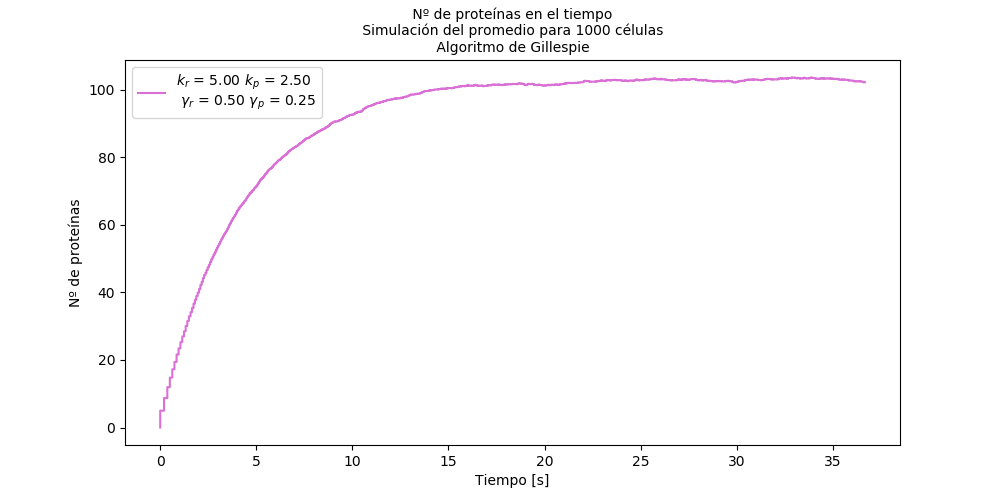

El promedio de proteína de 95.415 
El ruido de la traducción fue de 0.026


In [56]:
#Parámetros
p05=0
kr5=5
kp5=2.5

gammar5=kr5/10
gammap5=kp5/10
numcelulas5 = 1000
tmax5 = 1000

start = time.time()
t5a, p5a = gillespieP(p05, tmax5, kp5, kr5, gammap5, gammar5, numcelulas5)
end = time.time()
print("Tiempo que le toma {:.4f} segundos".format(end-start))

#Promedio

promp5a = np.zeros(tmax5)
promt5a = np.zeros(tmax5)

for i in range(tmax5):
    promp5a[i] = np.mean(p5a[i,:])
    promt5a[i] = np.mean(t5a[i,:])
    
fig5 = graficacelulaspromG1(promt5a, promp5a, kr5, kp5, gammar5, gammap5, tmax5, numcelulas5)

$\textbf{Parte B}$

Compare esto con los resultados del punto 3b). Describa las diferencias visuales en la simulación. Que tanto cambian el promedio y el ruido?

$\textbf{Comentarios}$

El comportamiento es bastante similar al de RNA debido a que en el caso presente, la cantidad de proteína depende de su misma producción, con ello, el crecimiento no es tan alto en comparación con los casos pasados.
También, el promedio que tiene es mayor que en el caso anterior así como el ruido. 